# Анализ окупаемости рекламы приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: три датасета с информацией о посещениях сайта, о заказах, о расходах на рекламу.

**Цель исследования:**

Изучить:
1. Откуда приходят пользователи и какими устройствами они пользуются;
2. Сколько стоит привлечение пользователей из различных рекламных каналов;
3. Сколько денег приносит каждый клиент;
4. Когда расходы на привлечение клиента окупаются;
5. Какие факторы мешают привлечению клиентов.

**Ход исследования:**

Наше исследование пройдет в 6 этапов:

1. Загрузка данных и подготовка их к анализу;
2. Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии;
3. Исследовательский анализ данных;
4. Маркетинг;
5. Оценка окупаемости рекламы;
6. Выводы и рекомендации.

### Загрузите данные и подготовьте их к анализу

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')# прочитаем csv-файлы

In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [5]:
visits.head()# выводим первые 5 строк датафреймов на экран

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
visits.info()# выводим основную информацию о датафреймах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Мы получили информацию о трех датафреймах. Датафрейм visits имеет 309901 строк и 6 столбцов, датафрейм orders имеет 40212 строк и 3 столбца, датафрейм costs имеет 1800 строк и 3 столбца. Необходимо будет переименовать столбцы в датафреймах. Можно приступать к предобработке данных.

In [11]:
# переименуем столбцы в датафреймах
visits = visits.rename(columns = {'User Id':'user_id',
                              'Region':'region',
                              'Device':'device',
                              'Channel':'channel',
                              'Session Start':'session_start',
                              'Session End':'session_end'
                             }
)

In [12]:
orders = orders.rename(columns = {'User Id':'user_id',
                              'Event Dt':'event_dt',
                              'Revenue':'revenue'
                             }
)

In [13]:
costs = costs.rename(columns = {'Channel':'channel'})

In [14]:
visits['region'].unique()# выводим уникальные значения столбца region датафрейма visits

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [15]:
visits['device'].unique()# выводим уникальные значения столбца device датафрейма visits

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [16]:
visits['channel'].unique()# выводим уникальные значения столбца channel датафрейма visits

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [17]:
orders['revenue'].unique()# выводим уникальные значения столбца revenue датафрейма orders

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

In [18]:
costs['channel'].unique()# выводим уникальные значения столбца channel датафрейма costs

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [19]:
costs['costs'].sort_values().unique()# выводим уникальные значения столбца costs датафрейма costs

array([  0.8  ,   1.26 ,   1.44 ,   1.6  ,   1.62 ,   1.8  ,   1.92 ,
         1.98 ,   2.16 ,   2.34 ,   2.4  ,   2.4  ,   2.52 ,   2.64 ,
         2.7  ,   2.73 ,   2.73 ,   2.75 ,   2.88 ,   2.925,   2.94 ,
         3.   ,   3.06 ,   3.12 ,   3.15 ,   3.2  ,   3.24 ,   3.36 ,
         3.42 ,   3.5  ,   3.57 ,   3.575,   3.6  ,   3.75 ,   3.78 ,
         3.84 ,   3.9  ,   3.96 ,   3.99 ,   4.   ,   4.08 ,   4.095,
         4.14 ,   4.2  ,   4.225,   4.25 ,   4.32 ,   4.41 ,   4.5  ,
         4.55 ,   4.56 ,   4.62 ,   4.68 ,   4.75 ,   4.8  ,   4.8  ,
         4.83 ,   4.86 ,   5.   ,   5.04 ,   5.13 ,   5.22 ,   5.25 ,
         5.28 ,   5.4  ,   5.46 ,   5.46 ,   5.5  ,   5.52 ,   5.525,
         5.58 ,   5.6  ,   5.67 ,   5.75 ,   5.76 ,   5.85 ,   5.88 ,
         5.915,   5.94 ,   6.   ,   6.175,   6.24 ,   6.25 ,   6.3  ,
         6.37 ,   6.4  ,   6.435,   6.48 ,   6.5  ,   6.51 ,   6.6  ,
         6.72 ,   6.75 ,   6.825,   6.825,   6.9  ,   6.96 ,   7.02 ,
         7.14 ,   7.

Редких,выбивающихся значений, дубликатов в столбцах датафреймов не обнаружено

In [20]:
visits.isna().sum()# выведем количество пропущенных значений для каждого столбца датафреймов

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [21]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [22]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [23]:
visits.duplicated().sum()# проверим датафреймы на дубликаты

0

In [24]:
orders.duplicated().sum()

0

In [25]:
costs.duplicated().sum()

0

In [26]:
visits['session_start'] = pd.to_datetime(visits['session_start'])# преобразуем данные о времени

In [27]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [28]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [29]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [30]:
visits.info()# проверим, как мы переименовали столбцы и изменили типы данных в датафреймах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [32]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Мы провели предобработку данных. Переименовали столбцы, где это потребовалось и проверили их на редкие, выбивающиеся значения, дубликаты и пропуски. Ничего из этого в датафреймах не обнаружено.Также мы преобразовали тип данных в некоторых столбцах. Сравнили информацию о датафрейме до исправлений и после. Данные пригодны для дальнейшего анализа.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [33]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [34]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [35]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [36]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [37]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [38]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [39]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [40]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Мы задали функции вычисления значений метрик, а также функции для построения графиков.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [41]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [42]:
# определяем минимальную дату привлечения пользователей
min_acquitision_dt = profiles['dt'].min()
min_acquitision_dt

datetime.date(2019, 5, 1)

Минимальная дата привлечения пользователей: 01.05.2019

In [43]:
# определяем максимальную дату привлечения пользователей
max_acquitision_dt = profiles['dt'].max()
max_acquitision_dt

datetime.date(2019, 10, 27)

Максимальная дата привлечения пользователей: 27.10.2019

Минимальная и максимальная даты привлечения пользователей совпадают с датами технического задания

In [44]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
region_payer = profiles.groupby('region').agg({'payer':['count','mean']})
region_payer.columns = ['count_users', 'share_payer']
region_payer['share_payer'] = region_payer['share_payer'].apply(lambda x: format(x, '.2%'))
region_payer.sort_values(by = 'share_payer', ascending = False)

,count_users,share_payer
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


Доля платящих пользователей выше в США, она составляет  6.9 % из 100002 пользователей. Ниже всего доля платящих во Франции, она составляет 4,1 % из 17450 пользователей.

In [45]:
# построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
device_payer = profiles.groupby('device').agg({'payer':['count','mean']})
device_payer.columns = ['count_users', 'share_payer']
device_payer['share_payer'] = device_payer['share_payer'].apply(lambda x: format(x, '.2%'))
device_payer.sort_values(by = 'share_payer', ascending = False)

,count_users,share_payer
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


Процент платящих пользователей выше всего среди пользователей, использующих Mac. Ниже всего среди пользователей, использующих PC. 6.4 % и 5 % соответственно.

In [46]:
# построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
channel_payer = profiles.groupby('channel').agg({'payer':['count','mean']})
channel_payer.columns = ['count_users', 'share_payer']
channel_payer['share_payer'] = channel_payer['share_payer'].apply(lambda x: format(x, '.2%'))
channel_payer.sort_values(by = 'share_payer', ascending = False)

,count_users,share_payer
channel,,
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%
OppleCreativeMedia,8605,2.71%
organic,56439,2.06%
FaceBoom,29144,12.20%


Процент платящих пользователей выше всего среди пользователей, пришедших из канала привлечения FaceBoom. Ниже всего среди пользователей, нашедших приложение самостоятельно. 12.2% и 2.1% соответственно.

Мы составили профили пользователей и выяснили, что:
 - Минимальная дата привлечения пользователей: 01.05.2019;
 - Максимальная дата привлечения пользователей: 27.10.2019;
 - Доля платящих пользователей выше в США, она составляет 6.9 % из 100002 пользователей. Ниже всего доля платящих во Франции, она составляет 4,1 % из 17450 пользователей;
 - Процент платящих пользователей выше всего среди пользователей, использующих Mac. Ниже всего среди пользователей, использующих PC. 6.4 % и 5 % соответственно;
 - Процент платящих пользователей выше всего среди пользователей, пришедших из канала привлечения FaceBoom. Ниже всего среди пользователей, нашедших приложение самостоятельно. 12.2% и 2.1% соответственно.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [47]:
round(profiles['acquisition_cost'].sum(),1)# посчитаем общую сумму расходов на маркетинг

105497.3

Общая сумма расходов на маркетинг составила 105497.3

In [48]:
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost', ascending = False)# выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего потратили на рекламный источник TipTop - 54751.30. Меньше всего потратили на рекламный источник YRabbit - 944.22.

In [49]:
profiles['week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week# добавим столбец с неделей проведения рекламной кампании в датафрейм с профилями пользователей

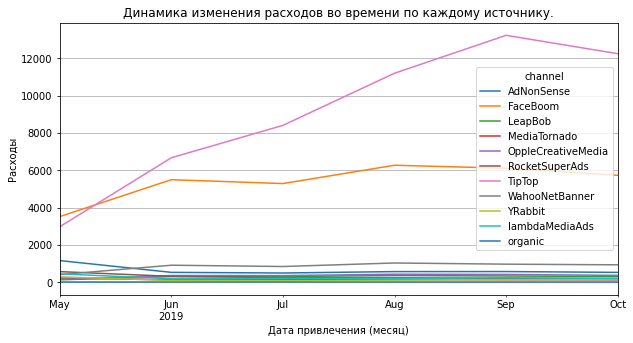

In [50]:
# построим визуализацию динамики изменения расходов во времени (по месяцам) по каждому источнику
profiles.pivot_table(
    index=['month'], columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения (месяц)')
plt.title('Динамика изменения расходов во времени по каждому источнику.')
plt.xticks(rotation=45)
plt.show()

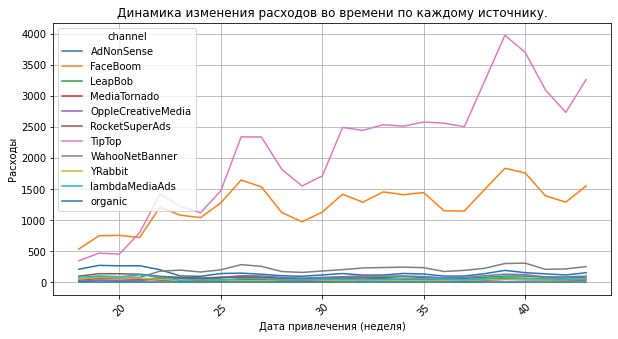

In [51]:
# построим визуализацию динамики изменения расходов во времени (по неделям) по каждому источнику
profiles.pivot_table(
    index=['week'], columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения (неделя)')
plt.title('Динамика изменения расходов во времени по каждому источнику.')
plt.xticks(rotation=45)
plt.show()

In [52]:
profiles.pivot_table(
    index=['month','week'], columns='channel', values='acquisition_cost', aggfunc='sum'
)

channel          AdNonSense  FaceBoom  LeapBob  MediaTornado  \
month      week                                                
2019-05-01 18        211.05     535.7    16.80         38.64   
           19        273.00     750.2    31.71         61.68   
           20        265.65     755.7    26.67         59.04   
           21        266.70     722.7    26.67         50.16   
           22        153.30     760.1    38.43         29.04   
2019-06-01 22         49.35     448.8    27.09          7.92   
           23        102.90    1081.3    66.99         27.60   
           24         96.60    1042.8    52.29         29.76   
           25        141.75    1280.4    68.46         32.16   
           26        148.05    1647.8    99.75         40.56   
2019-07-01 27        130.20    1536.7    87.36         43.44   
           28        106.05    1124.2    62.58         28.80   
           29         97.65     975.7    61.11         26.40   
           30        118.65    1130.8    67.20         25.20   
           31         51.45     526.9    35.28         14.64   
2019-08-01 31         90.30     892.1    48.30         20.40   
           32        116.55    1290.3    87.57         29.04   
           33        117.60    1456.4    77.49         40.80   
           34        142.80    1411.3    90.51         35.28   
           35        112.35    1224.3    65.94         29.04   
2019-09-01 35         21.00     221.1    11.97          4.80   
           36        100.80    1151.7    66.99         30.24   
           37        100.80    1148.4    63.84         25.92   
           38        139.65    1496.0    81.27         30.24   
           39        192.15    1837.0   101.22         48.24   
           40         27.30     260.7    18.69          5.28   
2019-10-01 40        128.10    1500.4    82.32         36.72   
           41        136.50    1392.6    78.96         36.96   
           42        118.65    1291.4    69.72         29.04   
           43        154.35    1552.1    84.42         37.44   

channel          OppleCreativeMedia  RocketSuperAds  TipTop  WahooNetBanner  \
month      week                                                               
2019-05-01 18                 24.00          99.450   347.0            49.2   
           19                 34.50         139.230   470.0            92.4   
           20                 27.50         138.060   454.0            90.0   
           21                 34.25         131.040   801.8            79.2   
           22                 49.50          70.200   908.2           108.0   
2019-06-01 22                 32.25          27.495   513.0            71.4   
           23                 79.50          76.050  1223.6           196.8   
           24                 71.50          63.180  1121.0           166.2   
           25                 79.75          80.730  1474.4           201.6   
           26                107.00          78.260  2343.6           285.0   
2019-07-01 27                102.50          75.075  2340.0           256.8   
           28                 81.00          55.965  1820.0           174.0   
           29                 68.00          41.860  1552.2           159.6   
           30                 80.75          54.600  1713.4           182.4   
           31                 34.25          24.570   984.6            78.6   
2019-08-01 31                 56.50          37.310  1509.0           126.0   
           32                104.00          69.615  2448.0           231.6   
           33                 98.50          62.010  2538.0           238.2   
           34                103.75          40.300  2514.0           244.8   
           35                 76.50          43.875  2193.0           199.8   
2019-09-01 35                 16.25           7.475   390.0            36.0   
           36                 72.75          40.625  2563.0           174.6   
           37                 78.00          40.950  25

Расходы на привлечение пользователей то растут, то убывают. Максимальная стоимость рекламы замечена на 39 неделе под конец сентября. А минимальная стоимость замечена на 35 неделе в начале сентября.

In [53]:
# узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
cac = round(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).query('channel!="organic"').sort_values(by='acquisition_cost', ascending = False),3)
cac

,acquisition_cost
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


In [54]:
# средний САС по всем каналам
round(cac['acquisition_cost'].mean(),2)

0.76

На первом месте по стоимости привлечения одного пользователя находится источник TipTop (2.8).
На последнем месте находится источник LeapBob (0.21).

Общая сумма расходов на маркетинг составила 105497.3. 
Больше всего потратили на рекламный источник TipTop - 54751.30.Меньше всего потратили на рекламный источник YRabbit - 944.22. 
Расходы на привлечение пользователей то растут, то убывают. Максимальная стоимость рекламы замечена на 39 неделе под конец сентября. А минимальная стоимость замечена на 35 неделе в начале сентября.
На первом месте по стоимости привлечения одного пользователя находится источник TipTop (2.8). На последнем месте находится источник LeapBob (0.21).

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [55]:
profiles = profiles.query('channel != "organic"') # исключим пользователей с органическим трафиком

In [56]:
observation_date =  datetime(2019, 11, 1).date()# момент анализа

In [57]:
horizon_days = 14# горизонт анализа 

In [58]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days
)

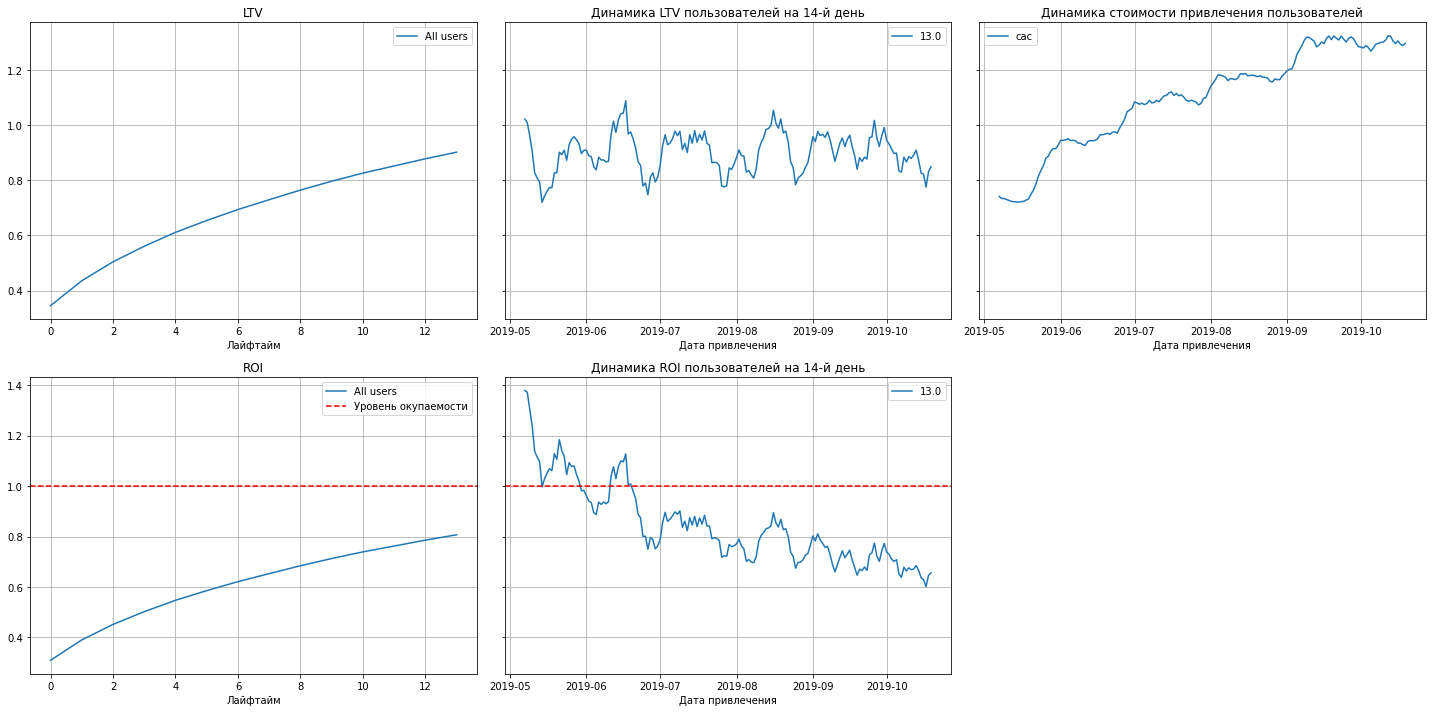

In [59]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается. ROI в конце двух недель — чуть выше 80%.
CAC увеличивается. Увеличение рекламного бюджета могло повлиять на неокупаемость рекламы.
Окупаемость рекламы была в мае-июле, когда и стоимость привлечения была ниже.

In [60]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

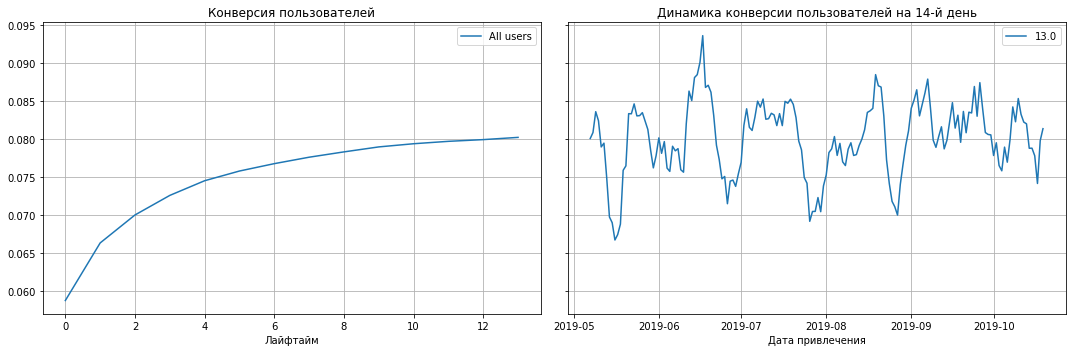

In [61]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия к концу двух недель составила примерно 8%. Конверсия стабильна, но в мае была пониже

In [62]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

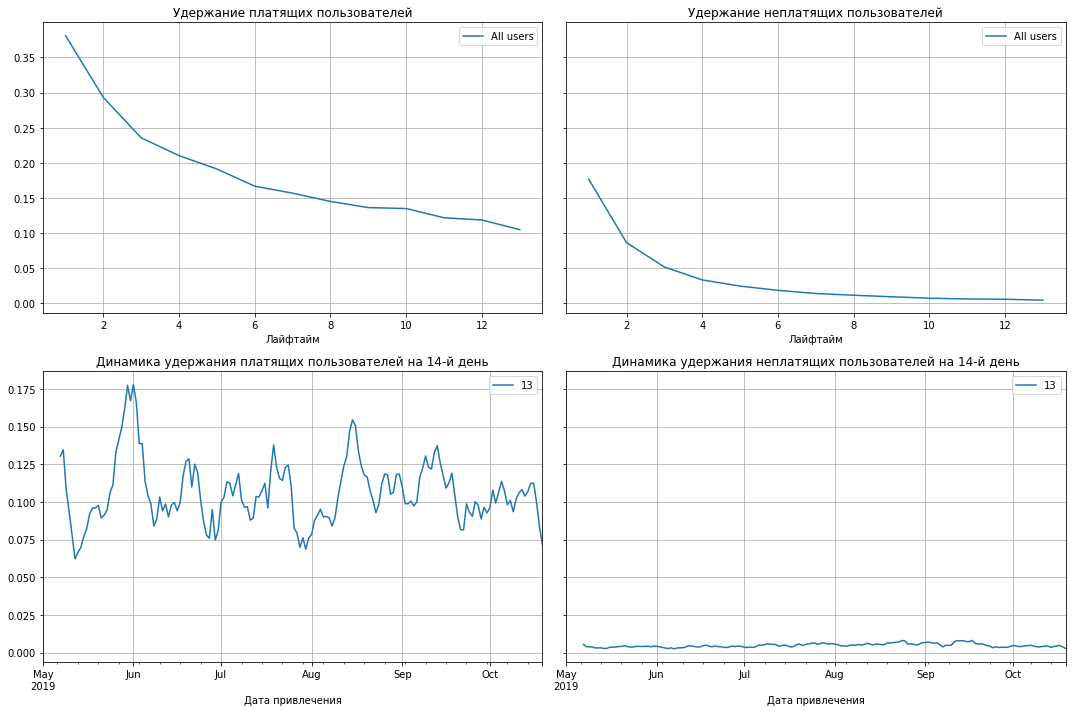

In [63]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей стабильное

In [64]:
# смотрим окупаемость с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

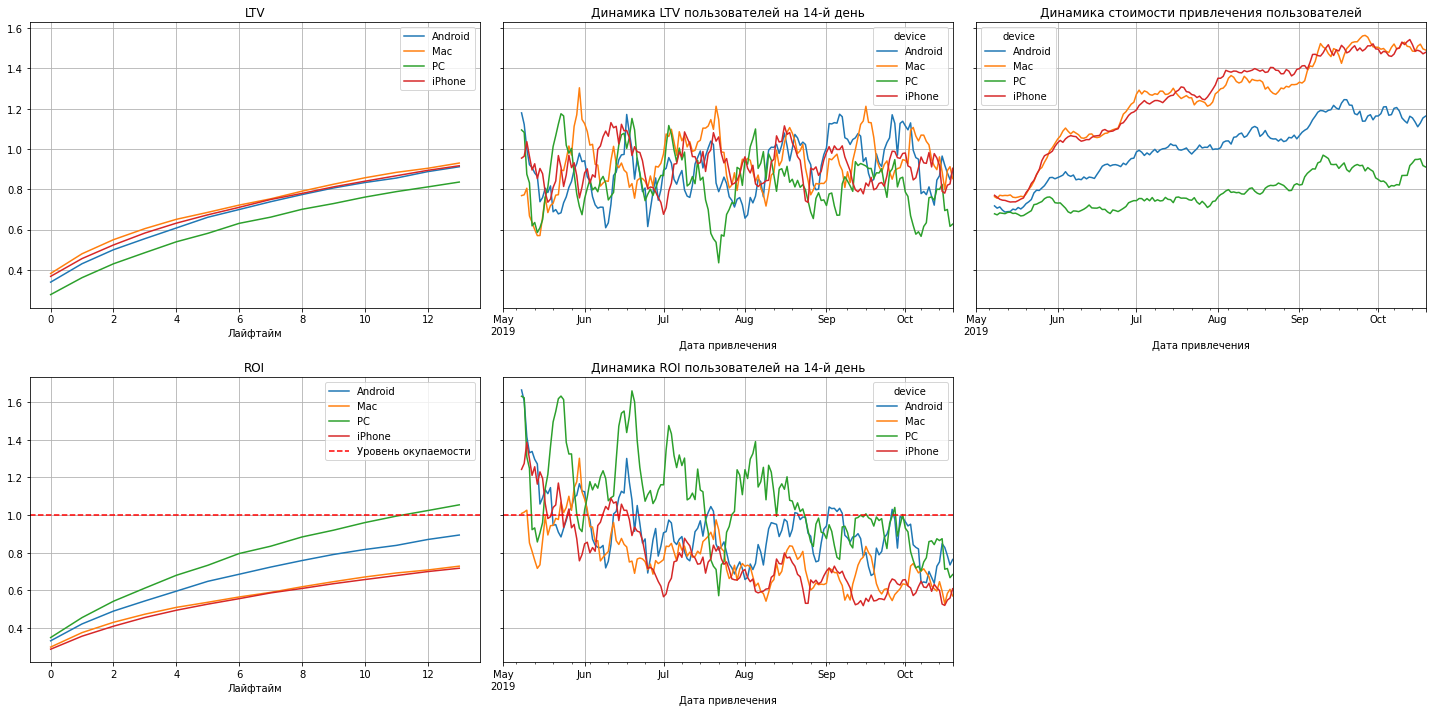

In [65]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=8
) 

Пользователи  PC окупаются уже на 11 день, а вот пользователи Mac,iPhone и Android не окупаются.
LTV стабилен.

Стоимость привлечения пользователей Mac, iPhone и Android выше, чем стоимость привлечения пользователей PC.

In [66]:
# смотрим конверсию с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])

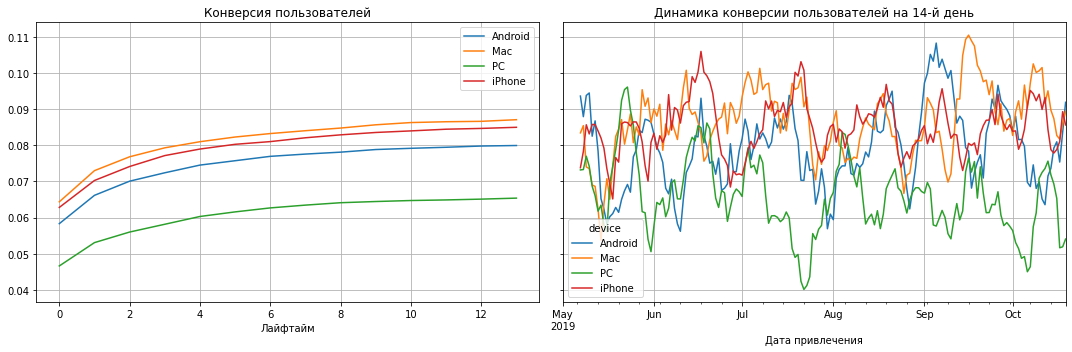

In [67]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

У пользователей Mac, iPhone и Android высокая конверсия

In [68]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['device'])

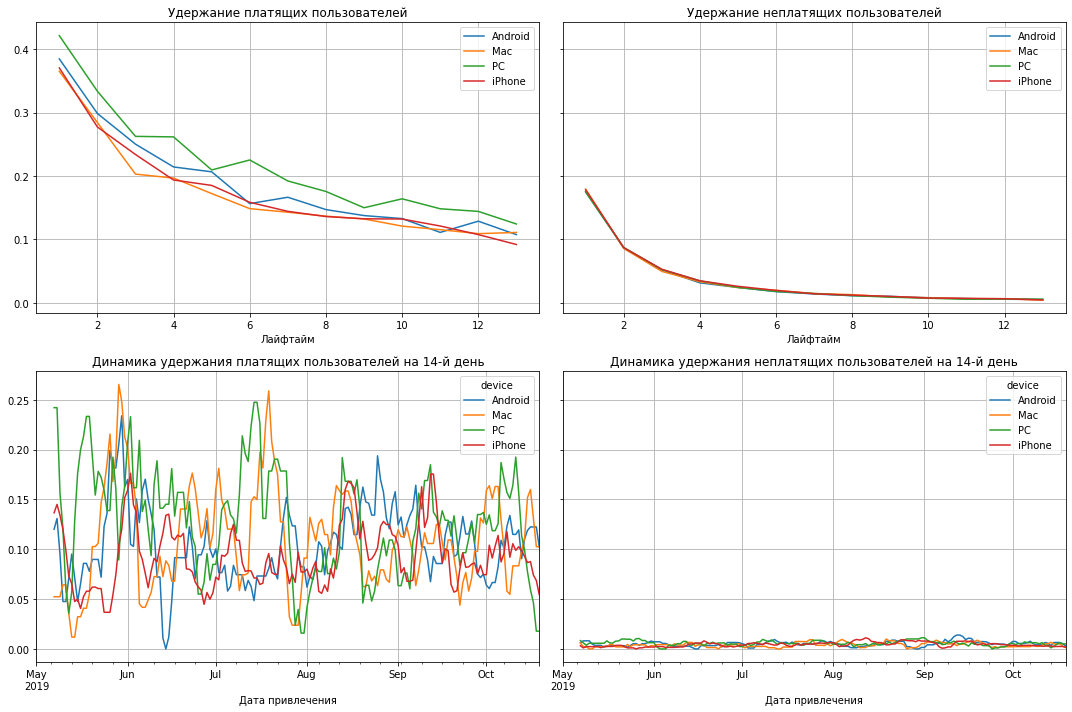

In [69]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей у пользователей Mac, iPhone и Android ниже, чем у пользователей PC

In [70]:
# смотрим окупаемость с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)

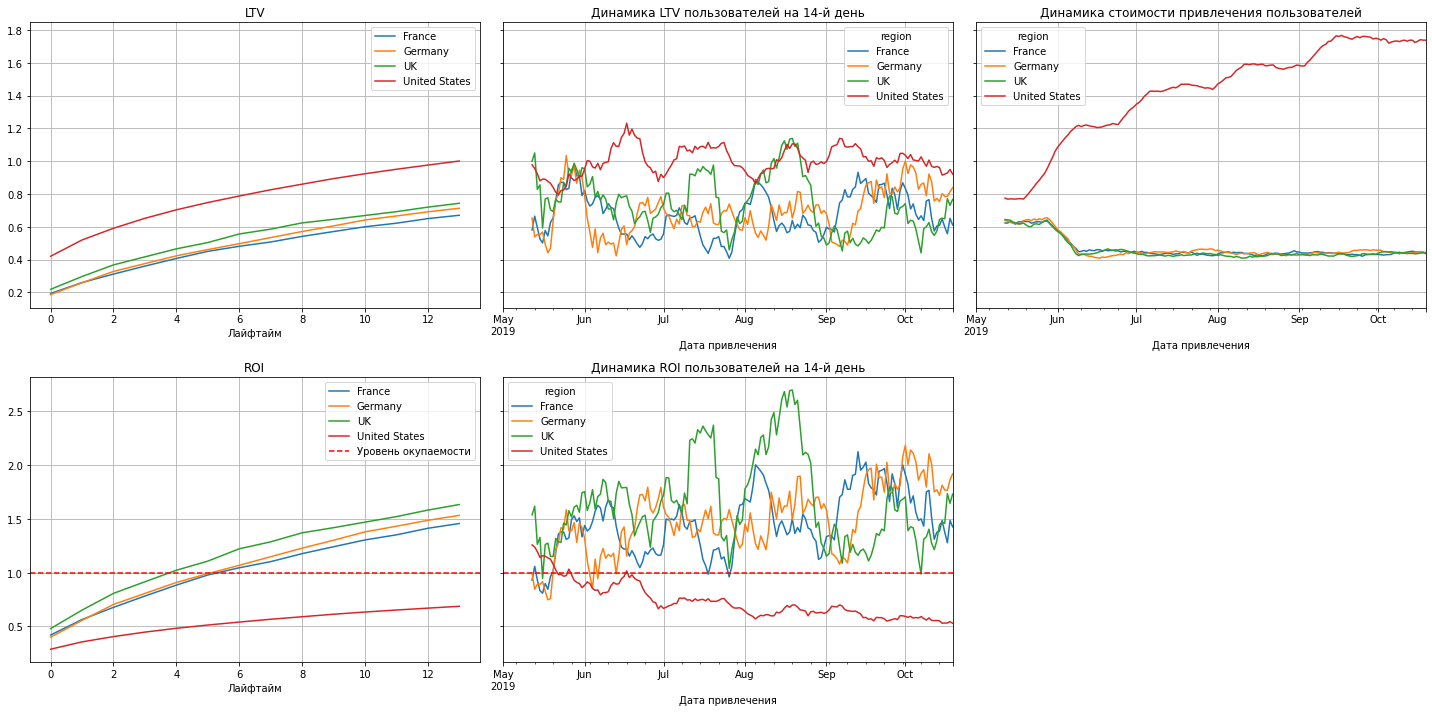

In [71]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=12
) 

Пользователи из США не окупаются, а в остальных странах хорошая стабильная окупаемость. LTV стабилен. Но стоимость привлечения пользователей из США сильно растет. Лучше всего окупается Украина.


In [72]:
# смотрим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])

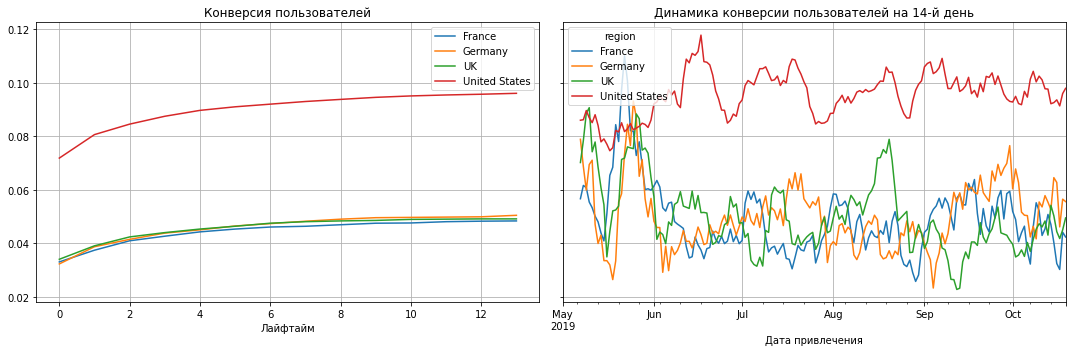

In [73]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у пользователей из США очень хорошая, выше всех.

In [74]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['region'])

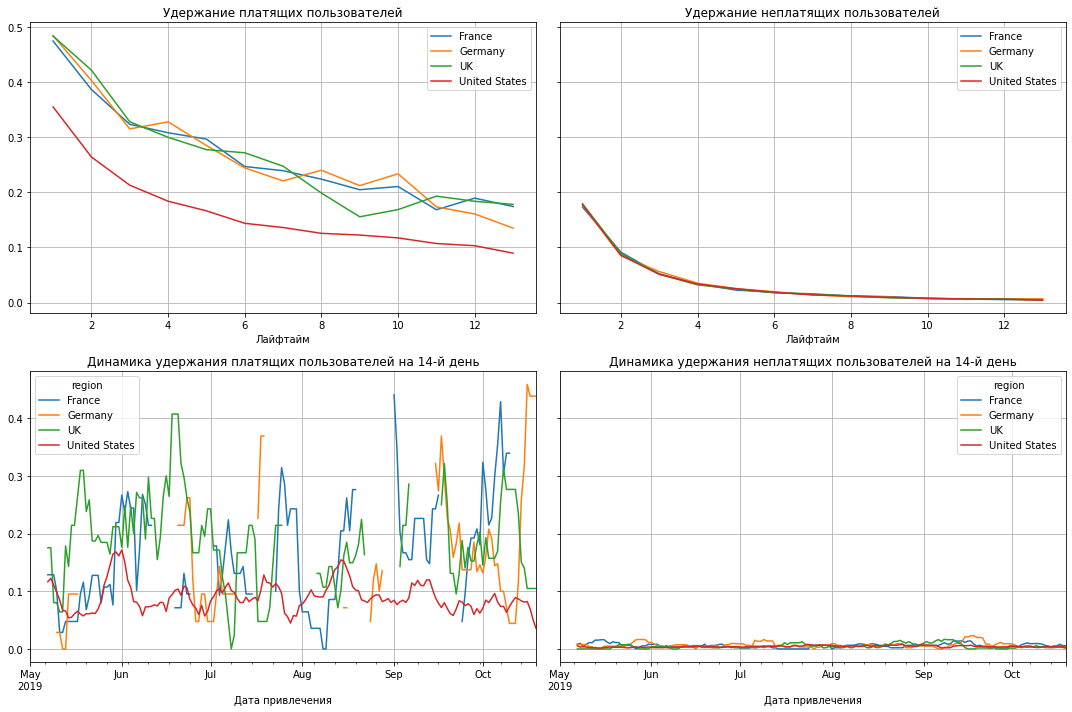

In [75]:
plot_retention(retention_grouped, retention_history, horizon_days)

А вот удержание очень низкое

In [76]:
# смотрим окупаемость с разбивкой по каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

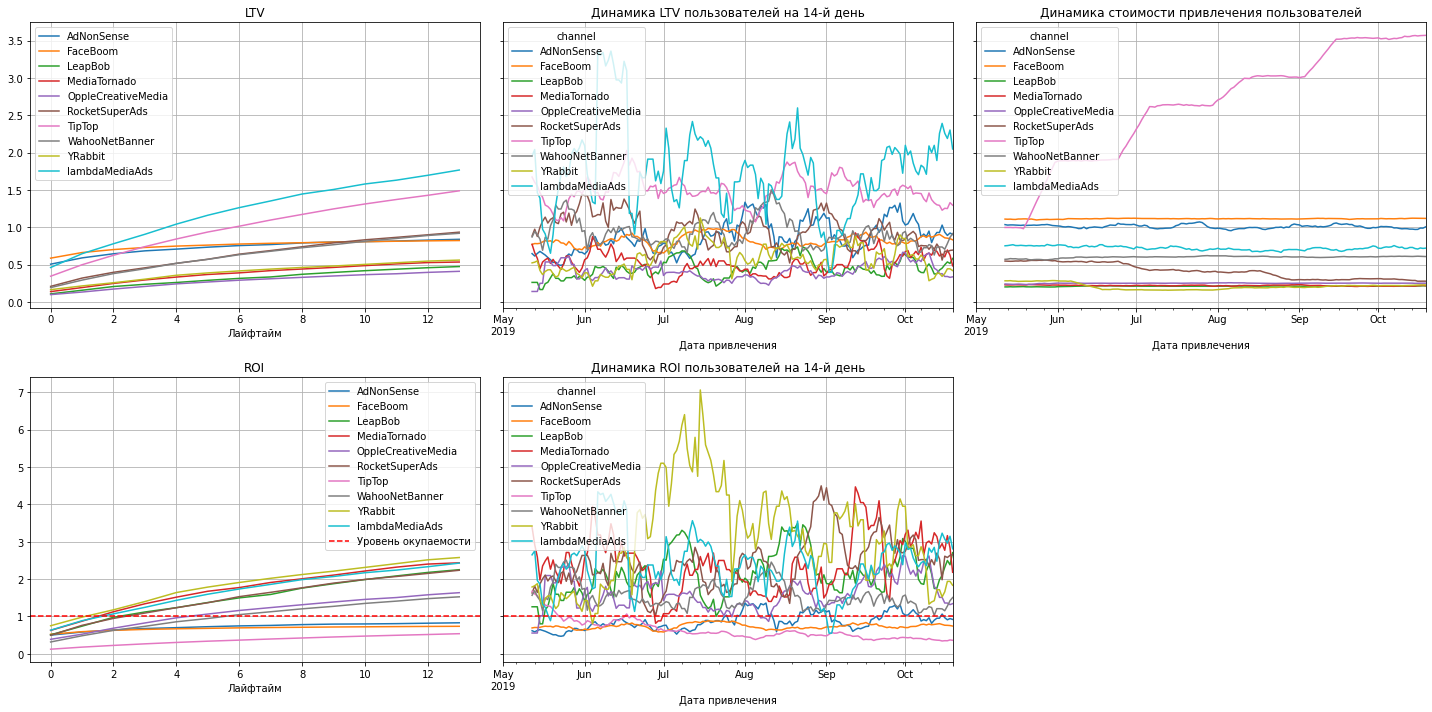

In [77]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=12
) 

Пользователи не окупаются, пришедшие из каналов:
1. TipTop
2. FaceBoom
3. AdNonSense

Из остальных каналов пользователи окупаются стабильно. LTV стабилен.
Лучшая окупаемость замечена у пользователей, пришедших из канала YRabbit.
Стоимость привлечения пользователей из канала TipTop сильно увеличивается. А стоимость привлечения пользователей из каналов FaceBoom, AdNonSense хоть и стабильная, но выше, чем из других каналов.

In [78]:
# смотрим конверсию с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

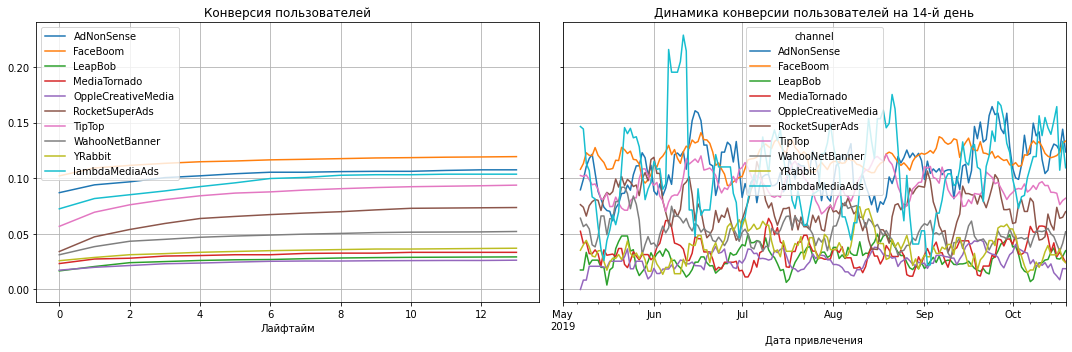

In [79]:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у пользователей убыточных каналов хорошая

In [80]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel'])

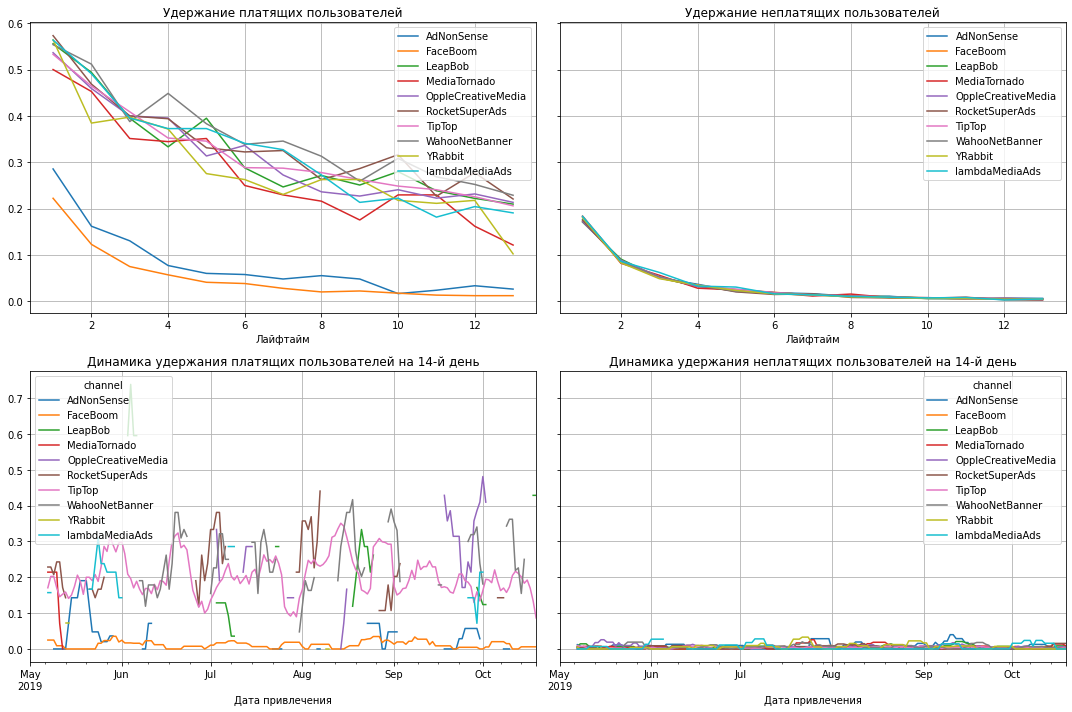

In [81]:
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание у пользователей, пришедших из каналов FaceBoom, AdNonSense очень низкое

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Реклама не окупается. 
Пользователи Mac,iPhone и Android не окупаются. Стоимость привлечения пользователей Mac, iPhone и Android выше, чем стоимость привлечения пользователей PC. Удержание пользователей Mac,iPhone и Android ниже, чем у пользователей PC.
Пользователи из США не окупаются. Стоимость привлечения пользователей из США сильно растет и  удержание очень низкое.
Пользователи не окупаются, пришедшие из каналов:
1. TipTop;
2. FaceBoom;
3. AdNonSense.

Стоимость привлечения пользователей из канала TipTop сильно увеличивается. А стоимость привлечения пользователей из каналов FaceBoom, AdNonSense хоть и стабильная, но выше, чем из других каналов. Удержание у пользователей, пришедших из каналов FaceBoom, AdNonSense очень низкое.

Необходимо снизить стоимость привлечения пользователей Mac, iPhone, Android; пользователей из США; пользователей, пришедших из канала TipTop. Убыточные каналы TipTop, FaceBoom, AdNonSense лучше убрать из средств продвижения рекламы, заместо них можно поискать другие. Можно обратить внимание на окупающиеся каналы lambdaMediaAds, YRabbit. 
Также важно повысить удержание пользователей Mac,iPhone и Android; пользователей США; пользователей, пришедших из каналов FaceBoom, AdNonSense. Его можно повысить путем введения системы вознаграждений или программы лояльности, предложением премиум подписки по низкой цене, использования push-уведомления для пользователей на всех этапах, отправкой сообщений в приложении для информирования пользователей, персонализации сообщений, настройкой обратной связи (опросы, отзывы о приложении), постоянной оптимизацией приложения, геймификации приложения.